 
<center>
    <h1>ĐỒ ÁN KHOA HỌC MÁY TÍNH </h1>
    <h2> NGHIÊN CỨU CÁC THUẬT TOÁN HỌC MÁY CÓ GIÁM SÁT ĐỂ XÂY DỰNG MÔ HÌNH DỰ ĐOÁN NGUY CƠ ĐỘT QUỴ </h2>
</center>

---
**Mô tả bài toán:**
   - Đột quỵ là một trong những nguyên nhân hàng đầu gây tử vong trên thế giới, đặc biệt ở những quốc gia có mức thu nhập thấp và trung bình. Theo Tổ chức Y tế Thế giới (WHO), hàng năm có hàng triệu người bị ảnh hưởng bởi đột quỵ và tỷ lệ này đang có xu hướng gia tăng do lối sống thiếu lành mạnh, tuổi thọ tăng cao, cùng với sự gia tăng của các bệnh nền như tăng huyết áp, tiểu đường, và bệnh tim mạch. Đáng chú ý, tình trạng đột quỵ ngày càng trẻ hóa, khiến vấn đề này trở nên cấp bách hơn khi không chỉ đe dọa sức khỏe người lớn tuổi mà còn ảnh hưởng nghiêm trọng đến lực lượng lao động trẻ.
        Việc dự đoán sớm nguy cơ đột quỵ có ý nghĩa vô cùng quan trọng trong việc hỗ trợ các bác sĩ, chuyên gia y tế và bệnh nhân trong việc phát hiện và can thiệp kịp thời, giảm thiểu nguy cơ tử vong cũng như giảm bớt hậu quả lâu dài do đột quỵ gây ra.
        Nhận thấy sự cấp thiết đó, nhóm em đã tiến hành xây dựng mô hình dự đoán nguy cơ đột quỵ sử dụng một số phương pháp học máy cơ bản. Mô hình này nhằm hỗ trợ phát hiện sớm các nguy cơ đột quỵ, giúp các bác sĩ và bệnh nhân có thể can thiệp kịp thời, giảm thiểu rủi ro tử vong cũng như hạn chế các di chứng nghiêm trọng do đột quỵ gây ra. Với các phương pháp học máy: Random Forest, Logistic Regression, XGBoost, mô hình được kỳ vọng sẽ cung cấp công cụ dự đoán chính xác, dễ triển khai và có thể ứng dụng thực tiễn trong môi trường y tế.
        
**Quy trình xây dựng mô hình dự đoán:**
1. Tiền xử lý dữ liệu:
    - Mã hóa dữ liệu
    - Xử lý ngoại lai
    - Cân bằng dữ liệu
    - Chuẩn hóa các thuộc tính
2. Huấn luyện mô hình:
    - Thuật toán Random Forest 
    - Thuật toán Logistic Regression 
    - Thuật toán XGBoost
3. Đánh giá hiệu suất các mô hình:

**Mô tả bộ dữ liệu:**
Tập dữ liệu dự đoán nguy cơ đột quỵ gồm 11 thuộc tính sau:
 - **gender:** "Male" hoặc "Female".
 - **age:** Tuổi của bệnh nhân.
 - **hypertension:** 0 nếu bệnh nhân không tăng huyết áp, 1 nếu bệnh nhân tăng huyết áp.
 - **heart_disease:** 0 nếu bệnh nhân không mắc bệnh tim, 1 nếu bệnh nhân có mắc bênh tim.
 - **ever_married:** "No" hoặc "Yes".
 - **work_type:** "children", "Govt_job", "Private" hoặc "Self-employed".
 - **Residence_type:** "Rural" hoặc "Urban".
 - **avg_glucose_level:** lượng glucose trung bình trong máu.
 - **bmi:** chỉ số khối cơ thể.
 - **smoking_status:** "formerly smoked", "never smoked", "smokes" hoặc "Unknown".
 - **stroke:** 1 nếu bệnh nhân bị đột quỵ hoặc 0  nếu không bị đột quỵ


**Bộ dữ liệu được lấy từ Kaggle**

---
*Copyright Đặng Tuyết Trang - 2121050964*
 


## 1. Khai báo thư viện

In [9]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay




### 2. Đọc dữ liệu 

In [11]:
df = pd.read_csv('data/brain_stroke.csv')

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [18]:
df.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2246,Female,7.0,0,0,No,children,Urban,79.58,15.5,Unknown,0
4100,Male,4.0,0,0,No,children,Rural,112.83,18.2,Unknown,0
3012,Female,32.0,0,0,Yes,Private,Rural,92.37,26.9,never smoked,0
3196,Male,58.0,0,0,Yes,Private,Urban,94.53,36.1,never smoked,0
1449,Male,12.0,0,0,No,children,Urban,64.08,18.2,Unknown,0
341,Male,34.0,0,0,Yes,Private,Urban,80.81,33.2,never smoked,0
1567,Male,36.0,0,0,No,Private,Rural,233.52,40.9,never smoked,0
560,Female,33.0,0,0,Yes,Private,Urban,69.40,47.8,never smoked,0
3816,Female,17.0,0,0,No,Private,Rural,109.39,26.3,never smoked,0
4768,Male,57.0,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0


In [20]:
#Kích thước của dữ liệu
df.shape

(4981, 11)

Dữ liệu có 4981 mẫu, 11 thuộc tính, trong đó có 10 thuộc tính đầu là đặc trưng (X), thuộc tính cuối là nhãn (Y)

### 3. Thông tin cơ bản về dữ liệu

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [15]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

* Không có dữ liệu thiếu 
* Các thuộc tính cần mã hóa: gender, ever_married, work_type, Residence_type, smoking_status.

In [16]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

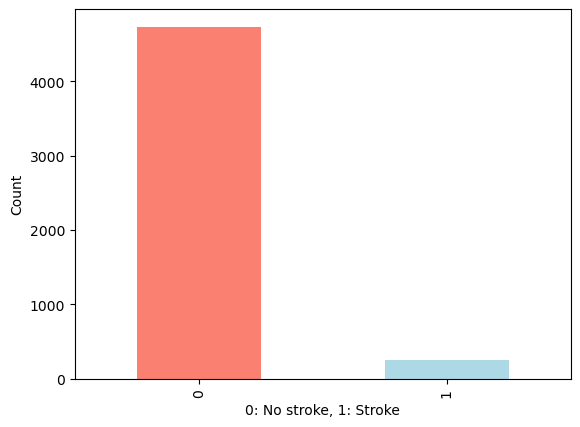

In [17]:
df['stroke'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: No stroke, 1: Stroke')
plt.ylabel('Count');

# B. Tiền xử lý dữ liệu

In [21]:
#Các thuộc tính cần mã hóa:
print("Những thuộc tính cần mã hóa là:")
for column in df.columns:
    if np.dtype (df[column]) == 'object':
        print(f"  +) {column}: {df[column].unique()}")

Những thuộc tính cần mã hóa là:
  +) gender: ['Male' 'Female']
  +) ever_married: ['Yes' 'No']
  +) work_type: ['Private' 'Self-employed' 'Govt_job' 'children']
  +) Residence_type: ['Urban' 'Rural']
  +) smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
